## Following the USGS documentation for `dataframes`

https://code.usgs.gov/ghsc/esi/libcomcat-python/-/blob/main/notebooks/Dataframes.ipynb

In [6]:
%matplotlib inline

 # stdlib imports
from datetime import datetime
import io

# Third party imports
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Local imports
from libcomcat.dataframes import (get_detail_data_frame, get_dyfi_data_frame,
                                  get_history_data_frame, get_magnitude_data_frame,
                                  get_pager_data_frame, get_phase_dataframe,
                                  get_summary_data_frame)
from libcomcat.search import search, get_event_by_id

In [7]:
import seaborn as sns

### Summary dataframe

In [8]:
len(search(starttime=datetime(1994, 1, 17, 12, 30), endtime=datetime(1994, 1, 18, 12, 35),
                   maxradiuskm=1, latitude=34.213, longitude=-118.537))

3

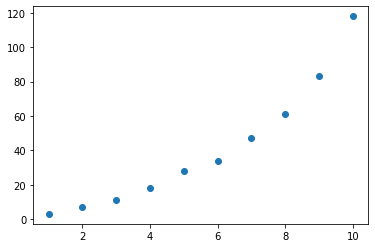

In [9]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [3, 7, 11, 18, 28, 34, 47, 61, 83, 118]

plt.scatter(x=x, y=y)

In [16]:
%%timeit
summary_events = search(starttime=datetime(2000, 1, 1, 12, 30), 
                        endtime=datetime(2022, 12, 31, 12, 35),
                   maxradiuskm=1, latitude=34.000, longitude=-118.000)



KeyboardInterrupt: 

In [ ]:
summary_df = get_summary_data_frame(summary_events)

summary_df.head()

In [11]:
print(len(summary_df))
print(summary_df['latitude'].max())
print(summary_df['latitude'].min())

NameError: name 'summary_df' is not defined

In [ ]:
sns.histplot(summary_df['depth'])

In [ ]:
sns.histplot(summary_df['magnitude'])

### Detail dataframe

In [31]:
summary_events = search(starttime=datetime(1994, 1, 17, 12, 30), endtime=datetime(1994, 1, 18, 12, 35),
                   maxradiuskm=2, latitude=34.213, longitude=-118.537)
detail_df = get_detail_data_frame(summary_events)

detail_df

,id,time,latitude,longitude,depth,magnitude,location,magtype,url,eventtype,alert,significance,gcmt_np1_strike,gcmt_np1_dip,gcmt_np1_rake,gcmt_np2_strike,gcmt_np2_dip,gcmt_np2_rake
0,ci3144585,1994-01-17 12:30:55.390,34.213,-118.537,18.202,6.70,"1km NNW of Reseda, CA",mw,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,None,1561,278.0,42.0,65.0,130.0,53.0,111.0
1,ci3141071,1994-01-17 23:56:15.480,34.212,-118.552,19.391,2.68,"2km WNW of Reseda, California",ml,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,None,110,NaN,NaN,NaN,NaN,NaN,NaN
2,ci3141138,1994-01-18 02:49:53.810,34.221,-118.521,17.316,2.60,"2km SE of Northridge, California",ml,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,None,104,NaN,NaN,NaN,NaN,NaN,NaN
3,ci3141149,1994-01-18 03:08:07.740,34.223,-118.536,17.147,2.60,"1km S of Northridge, California",ml,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,None,104,NaN,NaN,NaN,NaN,NaN,NaN
4,ci2150661,1994-01-18 04:04:57.940,34.204,-118.541,19.395,2.34,"1km WNW of Reseda, California",mc,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,None,84,NaN,NaN,NaN,NaN,NaN,NaN
5,ci2158418,1994-01-18 06:15:06.100,34.207,-118.535,14.124,2.47,"1km NNW of Reseda, California",mc,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,None,94,NaN,NaN,NaN,NaN,NaN,NaN
6,ci3141378,1994-01-18 08:38:26.840,34.216,-118.534,18.891,1.80,"2km N of Reseda, California",mh,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,None,50,NaN,NaN,NaN,NaN,NaN,NaN


### DYFI dataframe

In [33]:
dyfi_event = get_event_by_id('us2000h8ty')
dyfi_df = get_dyfi_data_frame(dyfi_event)

dyfi_df.sort_values(by='distance')

,station,lat,lon,distance,intensity,nresp
62,UTM:(54T 0572 4728 1000),42.705568,141.885260,35,8.9,1
60,UTM:(54T 0555 4724 1000),42.670965,141.677300,40,7.2,1
61,UTM:(54T 0556 4722 1000),42.652883,141.689310,40,4.1,1
63,UTM:(54T 0588 4705 1000),42.496797,142.077020,42,6.8,1
58,UTM:(54T 0550 4721 1000),42.644293,141.616020,43,6.6,1
...,...,...,...,...,...,...
5,UTM:(54S 0490 4233 1000),38.249460,140.891423,501,2.0,1
4,UTM:(54S 0489 4224 1000),38.168337,140.880128,510,2.7,1
2,UTM:(54S 0400 3959 1000),35.774525,139.899150,787,1.0,1
1,UTM:(54S 0389 3951 1000),35.701238,139.778575,798,1.0,1


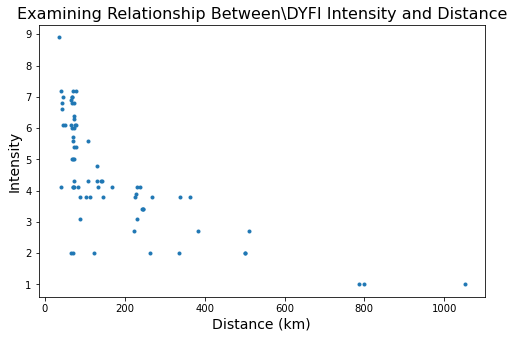

In [34]:
dist = dyfi_df['distance'].values
intensity = dyfi_df['intensity'].values
ind = dist.argsort()
dist = dist[ind]
intensity = intensity[ind]

plt.figure(figsize=(8, 5))
plt.plot(dist, intensity, '.', label='Intensity/Distance Data')
plt.xlabel('Distance (km)', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.title('Examining Relationship Between\DYFI Intensity and Distance', fontsize=16)
plt.show()

### Event History dataframe

In [35]:
history_event = get_event_by_id('nc73761796', includesuperseded=True)
history_df, _ = get_history_data_frame(history_event, ['dyfi','origin','shakemap'])

history_df

,Update Time,Product,Authoritative Event ID,Code,Associated,Product Source,Product Version,Elapsed (min),URL,Comment,Description
175,2022-07-23 01:41:18.666,origin,nc73761796,ew1658540470,True,ew,1,0.2,https://earthquake.usgs.gov/product/origin/ew1...,,Magnitude# 4.1|Time# 2022-07-23 01:41:04.31800...
180,2022-07-23 01:44:24.280,origin,nc73761796,nc73761796,True,nc,1,3.3,https://earthquake.usgs.gov/product/origin/nc7...,,Magnitude# 4.2|Time# 2022-07-23 01:41:04.48000...
181,2022-07-23 01:46:06.480,origin,nc73761796,nc73761796,True,nc,2,5.0,https://earthquake.usgs.gov/product/origin/nc7...,,Magnitude# 4.3|Time# 2022-07-23 01:41:04.48000...
0,2022-07-23 01:46:58.147,dyfi,nc73761796,nc73761796,True,us,1,5.9,https://earthquake.usgs.gov/product/dyfi/nc737...,,Max MMI# 3.4|NumResponses# 5
182,2022-07-23 01:47:10.450,origin,nc73761796,nc73761796,True,nc,3,6.1,https://earthquake.usgs.gov/product/origin/nc7...,,Magnitude# 4.3|Time# 2022-07-23 01:41:04.48000...
...,...,...,...,...,...,...,...,...,...,...,...
174,2022-07-29 10:18:43.047,dyfi,nc73761796,nc73761796,True,us,175,9157.6,https://earthquake.usgs.gov/product/dyfi/nc737...,,Max MMI# 4.4|NumResponses# 571
201,2022-08-01 20:50:59.640,shakemap,nc73761796,nc73761796,True,nc,7,14109.9,https://earthquake.usgs.gov/product/shakemap/7...,,MaxMMI# 4.7|Instrumented# 553|DYFI# 38|Fault# ...
178,2022-08-18 22:00:29.040,origin,nc73761796,us7000hsvi,True,us,3,38659.4,https://earthquake.usgs.gov/product/origin/us7...,,Magnitude# 4.0|Time# 2022-07-23 01:41:03.40600...
194,2022-08-18 22:03:56.128,shakemap,nc73761796,us7000hsvi,True,us,7,38662.9,https://earthquake.usgs.gov/product/shakemap/u...,,MaxMMI# 5.4|Instrumented# 281|DYFI# 38|Fault# ...


In [36]:
_

nc73761796 2022-07-23 01:41:04.680000 (39.466,-121.476) 0.6 km M4.2

### Pager dataframe

In [37]:
pager_event = get_event_by_id('us70005nie')
pager_df = get_pager_data_frame(pager_event)

pager_df

,id,location,time,latitude,longitude,depth,magnitude,country,pager_version,mmi1,mmi2,mmi3,mmi4,mmi5,mmi6,mmi7,mmi8,mmi9,mmi10
0,us70005nie,"70 km WSW of Constitución, Chile",2019-09-29 15:57:53.236,-35.4758,-73.163,11,6.7,Total,1,0,0,38125,3243721,86589,46426,0,0,0,0


In [38]:
pager_country_df = get_pager_data_frame(pager_event, get_country_exposures=True)

pager_country_df

,id,location,time,latitude,longitude,depth,magnitude,country,pager_version,mmi1,mmi2,mmi3,mmi4,mmi5,mmi6,mmi7,mmi8,mmi9,mmi10
0,us70005nie,"70 km WSW of Constitución, Chile",2019-09-29 15:57:53.236,-35.4758,-73.163,11,6.7,Total,1,0,0,38125,3243721,86589,46426,0,0,0,0
1,us70005nie,"70 km WSW of Constitución, Chile",2019-09-29 15:57:53.236,-35.4758,-73.163,11,6.7,AR,1,0,0,911,624,0,0,0,0,0,0
2,us70005nie,"70 km WSW of Constitución, Chile",2019-09-29 15:57:53.236,-35.4758,-73.163,11,6.7,CL,1,0,0,37214,3243097,86589,46426,0,0,0,0


### Magnitude dataframe

In [39]:
magnitude_event = get_event_by_id('ci38996632')
magnitude_df = get_magnitude_data_frame(magnitude_event, 'us', 'mb')

magnitude_df

,Channel,Type,Amplitude,Period,Status,Magnitude,Weight,Distance,Azimuth,MeasurementTime
0,TX.833A.BHZ.--,mb,1.211000e-07,1.20,automatic,4.90,0.00,NaN,NaN,2019-08-22 20:53:56.230
1,IM.ABK31.BHZ.--,mb,1.270000e-08,1.85,automatic,5.04,0.00,95.1845,1.53912,2019-08-22 21:03:20.045
2,N4.ABTX.HHZ.00,mb,5.500000e-08,1.52,automatic,4.73,1.00,NaN,NaN,2019-08-22 20:53:32.910
3,US.AGMN.BHZ.00,mb,6.180000e-08,1.30,automatic,4.78,1.00,NaN,NaN,2019-08-22 20:54:32.380
4,II.ARTI.BHZ.00,mb,5.800000e-09,0.80,automatic,4.95,0.00,88.0049,2.16586,2019-08-22 21:02:45.820
...,...,...,...,...,...,...,...,...,...,...
102,TX.WTFS.HHZ.00,mb,5.485000e-08,1.32,automatic,4.54,0.00,15.9472,92.07980,2019-08-22 20:53:41.300
103,AG.X40A.HHZ.00,mb,4.450000e-08,1.42,automatic,4.60,0.25,20.3669,86.66980,2019-08-22 20:54:32.180
104,N4.X48A.HHZ.00,mb,1.745000e-08,1.24,automatic,4.64,1.00,NaN,NaN,2019-08-22 20:55:21.440
105,N4.Z35B.HHZ.00,mb,1.393000e-07,1.46,automatic,4.88,0.25,NaN,NaN,2019-08-22 20:53:57.220


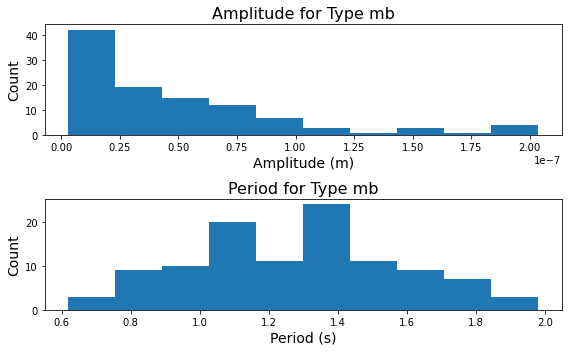

In [40]:
plt.figure(figsize=(8, 5))
plt.subplot(2, 1, 1)
plt.hist(magnitude_df['Amplitude'])
plt.xlabel('Amplitude (m)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Amplitude for Type mb', fontsize=16)
plt.subplot(2, 1, 2)
plt.hist(magnitude_df['Period'])
plt.xlabel('Period (s)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Period for Type mb', fontsize=16)
plt.tight_layout()
plt.show()

### Phase dataframe

In [41]:
phase_event = get_event_by_id('us70005nie')
phase_df = get_phase_dataframe(phase_event)

phase_df

,Channel,Distance,Azimuth,Phase,Arrival Time,Status,Residual,Weight,Agency
0,C1.BI05.BHZ.--,1.26956,180.99700,Pn,2019-09-29 15:58:15.350,manual,-1.5,1.23,us
1,C1.BO01.BHZ.--,2.02113,58.24670,Pn,2019-09-29 15:58:26.880,manual,-0.3,1.13,us
2,C1.BI02.BHZ.--,1.93615,128.29400,Pn,2019-09-29 15:58:25.460,manual,-0.6,1.14,us
3,C1.MT01.BHZ.--,2.25133,44.97420,Pn,2019-09-29 15:58:29.410,manual,-0.9,1.10,us
4,C1.MT09.BHZ.--,2.46762,47.22350,Pn,2019-09-29 15:58:32.990,manual,-0.4,1.07,us
...,...,...,...,...,...,...,...,...,...
99,WI.MPOM.BHZ.00,51.00050,15.42860,P,2019-09-29 16:06:53.620,manual,-0.8,1.04,us
100,IU.SBA.BHZ.10,61.44510,192.02400,P,2019-09-29 16:08:10.760,manual,1.6,1.06,us
101,IU.TEIG.BHZ.00,57.22150,343.04000,P,2019-09-29 16:07:40.470,manual,0.6,1.05,us
102,IU.QSPA.BHZ.10,54.76260,180.05300,P,2019-09-29 16:07:24.730,manual,2.1,1.05,us


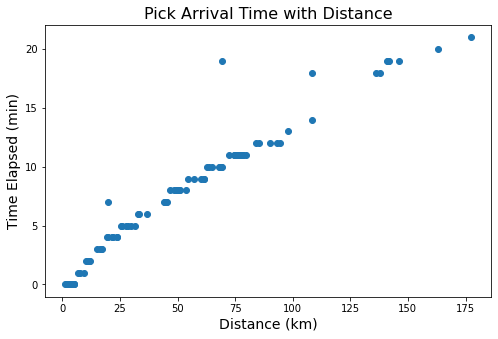

In [42]:
dist = phase_df['Distance'].values
time = phase_df['Arrival Time'].values
td = (time - time[0])*1e-9/60


fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(dist, td, 'o')
plt.xlabel('Distance (km)', fontsize=14)
plt.ylabel('Time Elapsed (min)', fontsize=14)
plt.title('Pick Arrival Time with Distance', fontsize=16)
plt.show()